### Array Operations & Mathematical Transformations

In [1]:
# Create samples images
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image1 = np.random.randint(0,256,(100,100,3), dtype=np.uint8)
image2 = np.random.randint(0,256,(100,100,3), dtype=np.uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-128..127].


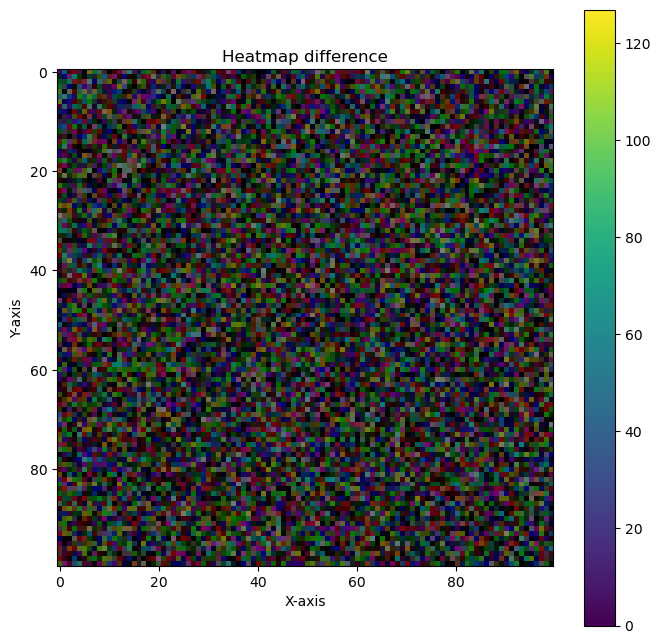

In [3]:
image1 = np.random.randint(0,256,(100,100,3), dtype=np.uint8)
image2 = np.random.randint(0,256,(100,100,3), dtype=np.uint8)

# Image arithmetic (important for background subtraction)
difference = np.abs(image1.astype(np.int16) - image2.astype(np.int16))
difference = difference.astype(np.int8)

plt.figure(figsize=(8, 8))  # Set the figure size
plt.imshow(difference)  # Use a colormap and specify interpolation method
plt.colorbar()  # Add a color bar to show the scale of values
plt.title('Heatmap difference')  # Add a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

#Show the plot
plt.show()

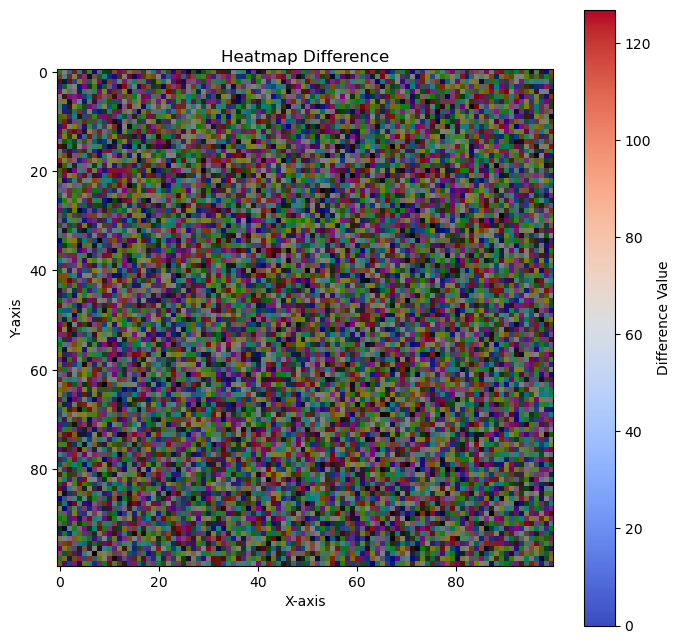

In [4]:
# using np.clip to get error free code snippet

import numpy as np
import matplotlib.pyplot as plt

# Generate random images
image1 = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)
image2 = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)

# Image arithmetic (important for background subtraction)
difference = np.abs(image1.astype(np.int16) - image2.astype(np.int16))

# Clip the difference values to a valid range
clipped_difference = np.clip(difference, -128, 127).astype(np.int8) # (-128, 127) == (0, 127) is within (0, 256)

# Create a figure and axis for plotting
plt.figure(figsize=(8, 8))  # Set the figure size

# Display the clipped difference using a colormap and specify interpolation method
plt.imshow(clipped_difference, cmap='coolwarm', interpolation='nearest')

# Add a color bar to show the scale of values
plt.colorbar(label='Difference Value')

# Add a title
plt.title('Heatmap Difference')

# Label axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()


In [5]:
# Background subtraction simulation
background = np.random.randint(0, 50, (100, 100, 3), dtype=np.uint8)
current_frame = background + np.random.randint(0, 30, (100, 100, 3), dtype=np.uint8)

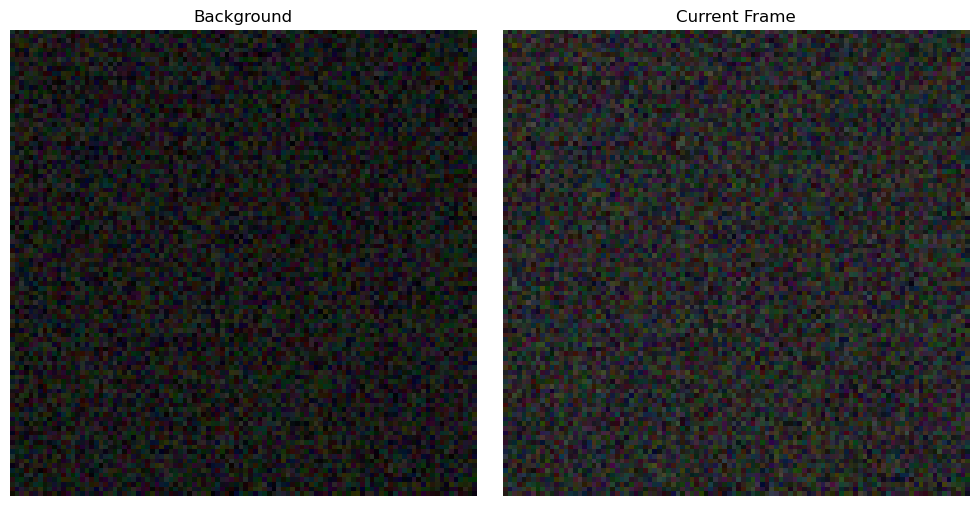

In [6]:
# Display the original and modified images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(background)
plt.title('Background')
plt.axis('off')

# Red Pixels Only
plt.subplot(1, 2, 2)
plt.imshow(current_frame)
plt.title('Current Frame')
plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Motion detection (basic)
motion = np.abs(current_frame.astype(np.int16) - background.astype(np.int16))
motion_mask = np.sum(motion, axis=2) > 50  # Threshold for motion

In [9]:
print(motion.shape)
print(motion_mask)

(100, 100, 3)
[[ True False False ... False  True False]
 [False  True False ...  True False  True]
 [False False False ... False False False]
 ...
 [False  True  True ... False False False]
 [False False False ...  True False False]
 [ True  True False ... False  True False]]


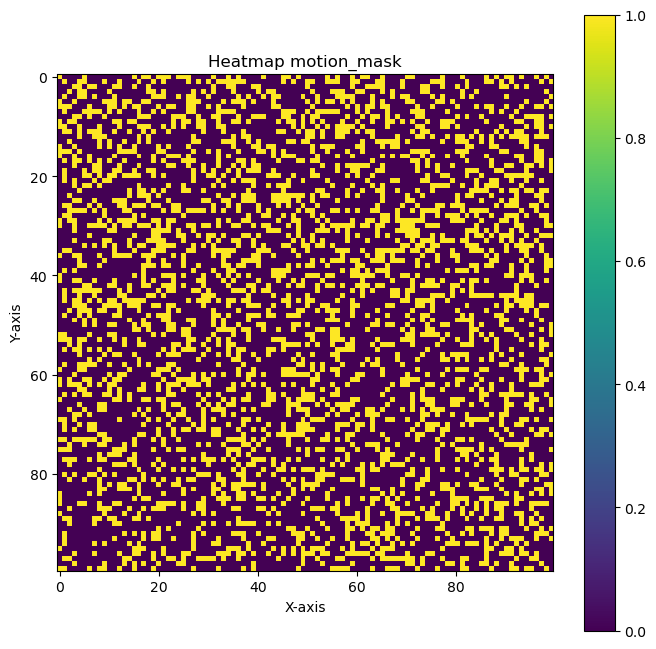

In [12]:
plt.figure(figsize=(8, 8))  # Set the figure size
plt.imshow(motion_mask)  # Use a colormap and specify interpolation method
plt.colorbar()  # Add a color bar to show the scale of values
plt.title('Heatmap motion_mask')  # Add a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

#Show the plot
plt.show()

In [23]:
# Brightness adjustments
brightened = np.clip(image1 + 50, 0, 255).astype(np.uint8)
darkened = np.clip(image1 - 50, 0, 255).astype(np.uint8)

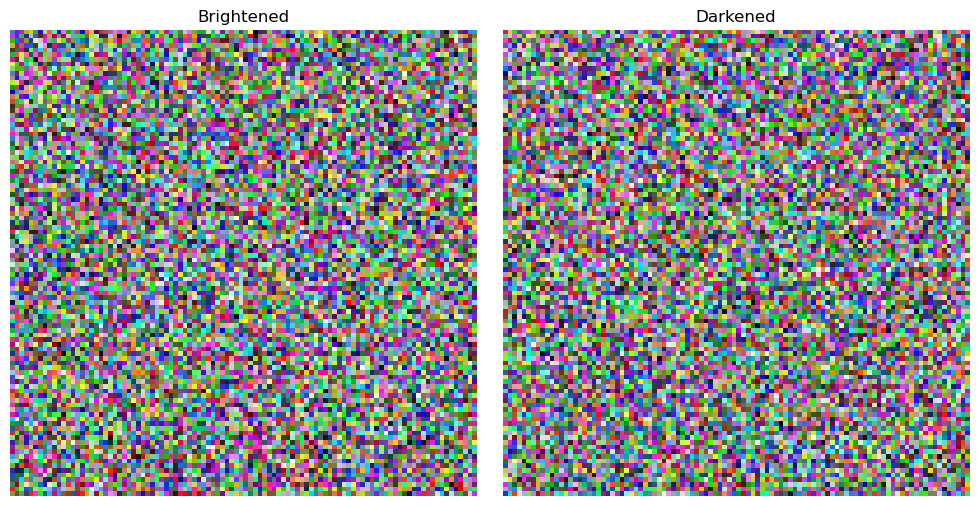

In [24]:
# Display the original and modified images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(brightened)
plt.title('Brightened')
plt.axis('off')

# Red Pixels Only
plt.subplot(1, 2, 2)
plt.imshow(darkened)
plt.title('Darkened')
plt.axis('off')

plt.tight_layout()
plt.show()

In [32]:
# Contrast adjustment
contrast_factor = 1.5
contrasted = np.clip(image1 * contrast_factor, 0, 255).astype(np.uint8)

# Normalization (useful for ML preprocessing)
normalized = image1 / 255.0  # Scale to 0-1 range
standardized = (image1 - np.mean(image1)) / np.std(image1)  # Z-score normalization
# Clip the difference values to a valid range
clipped_standardized = np.clip(standardized, -1.715, 1.725).astype(np.int8) 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7150223011502084..1.7250168515040507].


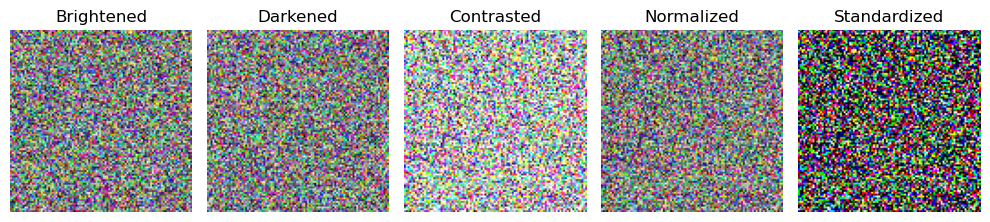

In [34]:
# Display the original and modified images
plt.figure(figsize=(10, 5))

# Brightened Image
plt.subplot(1, 5, 1)
plt.imshow(brightened)
plt.title('Brightened')
plt.axis('off')

# Darkened Image
plt.subplot(1, 5, 2)
plt.imshow(darkened)
plt.title('Darkened')
plt.axis('off')

# contrasted Image
plt.subplot(1, 5, 3)
plt.imshow(contrasted)
plt.title('Contrasted')
plt.axis('off')

# contrasted Image
plt.subplot(1, 5, 4)
plt.imshow(normalized)
plt.title('Normalized')
plt.axis('off')

# contrasted Image
plt.subplot(1, 5, 5)
plt.imshow(standardized)
plt.title('Standardized')
plt.axis('off')


plt.tight_layout()
plt.show()

In [37]:
print(f"Motion detected pixels: {np.sum(motion_mask)}")
print(f"Original range: {image1.min()}-{image1.max()}")
print(f"Normalized range: {normalized.min():.3f}-{normalized.max():.3f}")
print(f"Standardized range: {standardized.min():.3f} - {standardized.max():.3f}")

Motion detected pixels: 3231
Original range: 0-255
Normalized range: 0.000-1.000
Standardized range: -1.715 - 1.725


In [35]:
standardized.min()

np.float64(-1.7150223011502084)

In [38]:
clipped_standardized = np.clip(standardized, -1.715, 1.725)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.715..1.725].


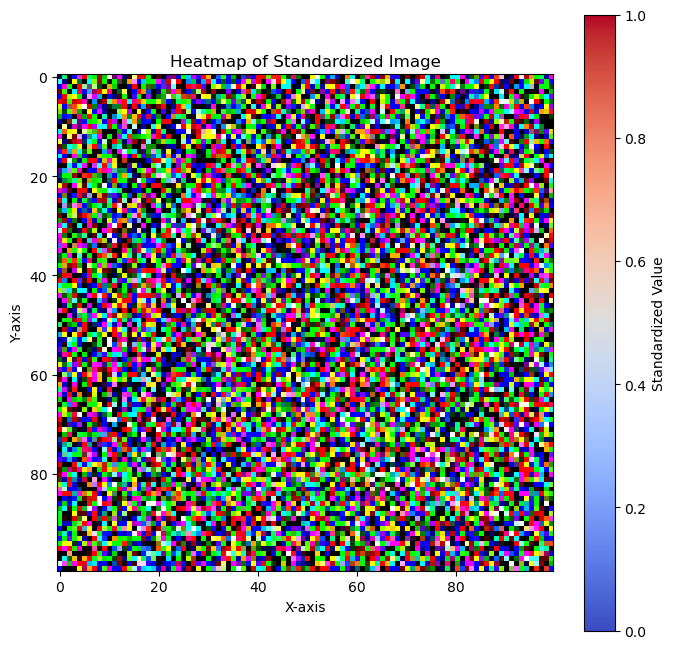

In [39]:
plt.figure(figsize=(8, 8))  # Set the figure size
plt.imshow(clipped_standardized, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Standardized Value')  # Add a color bar to show the scale of values
plt.title('Heatmap of Standardized Image')  # Add a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()  # Show the plot